# This script process the baseline results 

1. Compile the baseline with:
```
make bin/baseline
make bin/par_baseline
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_baseline
```
3. The output that we will process is baseline_coffee.txt (renamed from baseline.out)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

experiment ={}

with open("baseline_coffee.txt") as f:
    for line in f:
        tokens = line.split()
        if "Running:" in tokens:
            name=tokens[2].split("/")[3]
            nth=int(tokens[6])
            if name not in experiment:
                experiment[name]={'seq':{}, 'par':{} }
        if "SEQUENTIAL" in tokens:
            status="seq"
        if 'CORES' in tokens:
            status="par"
        if 'Octree' in tokens:
            experiment[name][status][nth]=[float(tokens[5])]
        if "STAGE" in tokens:
            experiment[name][status][nth].append(float(tokens[5]))
        if 'Average:' in tokens:
            experiment[name][status][nth].append(float(tokens[1]))

#print(experiment)

results = {}

for i in experiment:
    results[i]={'seq':{}, 'par':{} }
    results[i]['seq']['octree']=experiment[i]['seq'][1][0]
    results[i]['seq']['stage1']=mean(experiment[i]['seq'][1][1:15:3])
    results[i]['seq']['stage2']=mean(experiment[i]['seq'][1][2:15:3])
    results[i]['seq']['stage3']=mean(experiment[i]['seq'][1][3:15:3])
    results[i]['seq']['owm']=experiment[i]['seq'][1][16]
    for j in experiment[i]['par']:
        results[i]['par'][j]={}
        results[i]['par'][j]['octree']=experiment[i]['par'][j][0]
        results[i]['par'][j]['stage1']=mean(experiment[i]['par'][j][1:15:3])
        results[i]['par'][j]['stage2']=mean(experiment[i]['par'][j][2:15:3])
        results[i]['par'][j]['stage3']=mean(experiment[i]['par'][j][3:15:3])
        results[i]['par'][j]['owm']=experiment[i]['par'][j][16]
#print(results)
for i in experiment:
    print("Cloud {} has Octree creation time = {:.2f}".format(i,mean(list(results[i]['par'][j]['octree'] for j in [1,2,4,6,8]))))


Cloud Alcoy has Octree creation time = 4.74
Cloud Arzua has Octree creation time = 5.75
Cloud BrionF has Octree creation time = 5.97
Cloud BrionU has Octree creation time = 6.76


In [10]:
for i in experiment:
    print("Cloud {} has sequential OWM time = {:.2f}".format(i,results[i]['seq']['owm'] ))


Cloud Alcoy has sequential OWM time = 22.55
Cloud Arzua has sequential OWM time = 22.94
Cloud BrionF has sequential OWM time = 19.75
Cloud BrionU has sequential OWM time = 21.30


In [11]:
for i in experiment:
    print("Cloud {} has parallel OWM with 8 threads time(speedup) = {:.2f} ({:.1f}x)".format(i,results[i]['par'][8]['owm'],results[i]['seq']['owm']/results[i]['par'][8]['owm'] ))

Cloud Alcoy has parallel OWM with 8 threads time(speedup) = 3.73 (6.0x)
Cloud Arzua has parallel OWM with 8 threads time(speedup) = 4.11 (5.6x)
Cloud BrionF has parallel OWM with 8 threads time(speedup) = 6.23 (3.2x)
Cloud BrionU has parallel OWM with 8 threads time(speedup) = 7.33 (2.9x)


In [12]:
for i in experiment:
    for j in ['stage1','stage2','stage3']:
        print("Cloud {} stage {} time (percent) = {:.4f} ({:.2f}%)".format(i,j,results[i]['seq'][j],results[i]['seq'][j]/results[i]['seq']['owm']*100))


Cloud Alcoy stage stage1 time (percent) = 22.4948 (99.75%)
Cloud Alcoy stage stage2 time (percent) = 0.0155 (0.07%)
Cloud Alcoy stage stage3 time (percent) = 0.0413 (0.18%)
Cloud Arzua stage stage1 time (percent) = 22.8005 (99.40%)
Cloud Arzua stage stage2 time (percent) = 0.0064 (0.03%)
Cloud Arzua stage stage3 time (percent) = 0.1315 (0.57%)
Cloud BrionF stage stage1 time (percent) = 19.7320 (99.89%)
Cloud BrionF stage stage2 time (percent) = 0.0023 (0.01%)
Cloud BrionF stage stage3 time (percent) = 0.0187 (0.09%)
Cloud BrionU stage stage1 time (percent) = 21.2675 (99.84%)
Cloud BrionU stage stage2 time (percent) = 0.0023 (0.01%)
Cloud BrionU stage stage3 time (percent) = 0.0319 (0.15%)


# Spedup for each cloud

[0.99876879 1.99953894 3.17003092 4.57621753 6.04001393]
[0.99748654 1.91258526 3.05947316 4.36622506 5.58682839]
[1.00977931 1.69762025 2.82933467 3.19147561 3.16864242]
[1.000968   1.68250571 2.68533646 2.99804369 2.90716908]


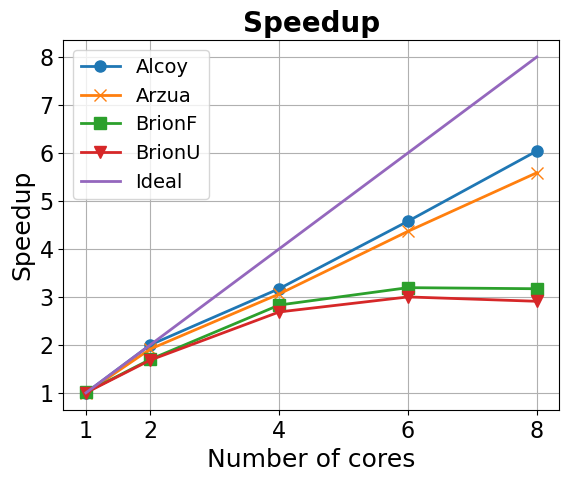

In [52]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

fig = plt.figure()

marks=['o-','x-','s-','v-','+-']

for (i,z) in zip(experiment,marks):
    print(np.array([results[i]['seq']['owm']/results[i]['par'][j]['owm'] for j in [1,2,4,6,8]]))
    plt.plot(np.array([1,2,4,6,8]), np.array([results[i]['seq']['owm']/results[i]['par'][j]['owm'] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
plt.plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=[i for i in experiment]
sizes.append('Ideal')
plt.title('Speedup',  fontweight='bold', fontsize=titlefs)
plt.legend(sizes,loc='best', fontsize= legendfs)
plt.ylabel('Speedup', fontsize=ylabelfs)
plt.xlabel('Number of cores', fontsize=xlabelfs)
plt.xticks([1,2,4,6,8],fontsize=xticksfs)
plt.yticks(fontsize=yticksfs)
plt.grid()

plt.show()

In [49]:
pp = PdfPages("Speedup-ompBaseline.pdf")
pp.savefig(fig)
pp.close()

# Start incremental file with results for each optimization

In [8]:
output="All_Optimizations.csv"

f = open(output, "a")
f.write("Optimization;Cloud;TimeTree;TimeOWM;Level;MinRadMaxNum\n")

for i in experiment:
    f.write("Baseline;{};{:.5f};{:.5f};{};{}\n".format(i,mean(list(results[i]['par'][j]['octree'] for j in [1,2,4,6,8])),results[i]['par'][8]['owm'],0,0))

f.close()